In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import cv2
import os
import pandas as pd
import numpy as np
from pathlib import Path

C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


### load raccoon data

In [2]:
df_train = pd.read_csv("D:/GeekBrains/comp_vision/les05/raccoons/r_annotations.csv", header=None, names=['filename', 'xmin', 'ymin', 'xmax', 'ymax', 'class'])
df_train.head(5)

,filename,xmin,ymin,xmax,ymax,class
0,raccoon-17.jpg,95,60,167,118,raccoon
1,raccoon-11.jpg,3,1,461,431,raccoon
2,raccoon-63.jpg,74,107,280,290,raccoon
3,raccoon-63.jpg,227,93,403,298,raccoon
4,raccoon-60.jpg,58,33,197,127,raccoon


### resize img

In [3]:
def read_image(path):
    return cv2.cvtColor(cv2.imread(str(path)), cv2.COLOR_BGR2RGB)

In [4]:
# im = cv2.cvtColor(cv2.imread('D:/GeekBrains/pytorch/les02/images_resized/raccoon-200.jpg'), cv2.COLOR_BGR2RGB)

# fig,ax = plt.subplots(1)
# ax.imshow(im, 'gray', vmin=0, vmax=1,)

In [5]:
def create_mask(bb, x):
    """Создаем маску для обрамляющего прямоугольника такого же шейпа как и изображение"""
    rows,cols,*_ = x.shape
    Y = np.zeros((rows, cols))
    bb = bb.astype(np.int)
    Y[bb[0]:bb[2], bb[1]:bb[3]] = 1.
    return Y

def mask_to_bb(Y):
    """Конвертируем маску Y в обрамляющий прямоугольник, принимая 0 как фоновый ненулевой объект """
    cols, rows = np.nonzero(Y)
    if len(cols)==0: 
        return np.zeros(4, dtype=np.int8)
    top_row = np.min(rows)
    left_col = np.min(cols)
    bottom_row = np.max(rows)
    right_col = np.max(cols)
#     return np.array([left_col, top_row, right_col, bottom_row], dtype=np.float32)
    return np.array([left_col, top_row, right_col, bottom_row], dtype=np.int8)

def create_bb_array(x):
    """Генерируем массив обрамляющих прямоугольников из столбца train_df"""
    return np.array([x[2],x[1],x[4],x[3]])

In [6]:
def resize_image_bb(read_path,write_path,bb,sz):
    """Ресайзим изображение и его обрамляющий прямоугольник и записываем изображение в новый путь"""
    im = read_image(read_path)
#     im_resized = cv2.resize(im, (int(1.49*sz), sz))
#     Y_resized = cv2.resize(create_mask(bb, im), (int(1.49*sz), sz))
    im_resized = cv2.resize(im, (int(1*sz), sz))
    Y_resized = cv2.resize(create_mask(bb, im), (int(1*sz), sz))
    new_path = str(write_path/read_path.parts[-1])
    cv2.imwrite(new_path, cv2.cvtColor(im_resized, cv2.COLOR_RGB2BGR))
    return new_path, mask_to_bb(Y_resized)

In [7]:
new_paths = []
# new_bbs = []
new_xmins = []
new_ymins = []
new_xmaxs = []
new_ymaxs = []


train_path_resized = Path('D:/GeekBrains/comp_vision/les05/raccoons/images_resized/')
for index, row in df_train.iterrows():
    new_path, new_bb = resize_image_bb(Path('D:/GeekBrains/comp_vision/les05/raccoons/images/' + row['filename']), train_path_resized, create_bb_array(row.values), 128)
    new_paths.append(new_path)
#     new_bbs.append(new_bb)
    new_xmins.append(new_bb[1])
    new_ymins.append(new_bb[0])
    new_xmaxs.append(new_bb[3])
    new_ymaxs.append(new_bb[2])

df_train['new_path'] = new_paths
df_train['new_xmin'] = new_xmins
df_train['new_ymin'] = new_ymins
df_train['new_xmax'] = new_xmaxs
df_train['new_ymax'] = new_ymaxs

In [8]:
df_train

,filename,xmin,ymin,xmax,ymax,class,new_path,new_xmin,new_ymin,new_xmax,new_ymax
0,raccoon-17.jpg,95,60,167,118,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,47,39,82,77
1,raccoon-11.jpg,3,1,461,431,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,0,0,89,127
2,raccoon-63.jpg,74,107,280,290,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,16,34,59,92
3,raccoon-63.jpg,227,93,403,298,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,48,30,85,95
4,raccoon-60.jpg,58,33,197,127,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,27,22,92,87
...,...,...,...,...,...,...,...,...,...,...,...
168,raccoon-137.jpg,71,8,304,233,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,28,4,121,124
169,raccoon-171.jpg,108,21,180,115,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,61,12,102,65
170,raccoon-190.jpg,78,54,153,135,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,38,35,75,88
171,raccoon-22.jpg,252,76,466,335,raccoon,D:\GeekBrains\comp_vision\les05\raccoons\image...,50,27,92,118


In [9]:
def show_image(path, bb):
    im = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)

    fig,ax = plt.subplots(1)
    ax.imshow(im, 'gray', vmin=0, vmax=1,)
    rect = patches.Rectangle((bb[0], bb[1]), bb[2]-bb[0], bb[3]-bb[1], linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

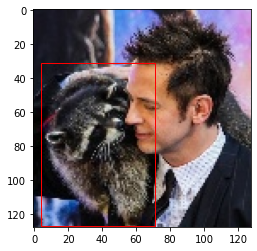

In [10]:
ind = 12
show_image(df_train['new_path'][ind], [df_train['new_xmin'][ind], df_train['new_ymin'][ind], df_train['new_xmax'][ind], df_train['new_ymax'][ind]])

In [11]:
# df_train_resized = df_train[['filename', 'new_xmin', 'new_ymin', 'new_xmax', 'new_ymax', 'class']]
# df_train_resized.head()

In [12]:
df_train_resized = df_train[['new_path', 'new_xmin', 'new_ymin', 'new_xmax', 'new_ymax', 'class']]
df_train_resized.head()

,new_path,new_xmin,new_ymin,new_xmax,new_ymax,class
0,D:\GeekBrains\comp_vision\les05\raccoons\image...,47,39,82,77,raccoon
1,D:\GeekBrains\comp_vision\les05\raccoons\image...,0,0,89,127,raccoon
2,D:\GeekBrains\comp_vision\les05\raccoons\image...,16,34,59,92,raccoon
3,D:\GeekBrains\comp_vision\les05\raccoons\image...,48,30,85,95,raccoon
4,D:\GeekBrains\comp_vision\les05\raccoons\image...,27,22,92,87,raccoon


In [13]:
df_train_resized.to_csv('D:/GeekBrains/comp_vision/les05/raccoons/images_resized/r_annotations_resized.csv', header=False, index=False)

### load model

In [14]:
if 0:
    !git clone https://github.com/fizyr/keras-retinanet.git

In [15]:
if 0:
    %cd keras-retinanet/
    !pip install .
    !python setup.py build_ext --inplace

### train and save model

In [16]:
%%time

%cd keras-retinanet/
!python keras_retinanet/bin/train.py \
    --random-transform \
    --weights "D:/GeekBrains/comp_vision/les05/resnet50_coco_best_v2.1.0.h5" \
    --steps 100 \
    --epochs 20 \
    csv "D:/GeekBrains/comp_vision/les05/raccoons/images_resized/r_annotations_resized.csv" "D:/GeekBrains/comp_vision/les05/raccoons/images_resized/r_classes.csv"

C:\Users\snetkova\GB\AI_comp_vision\les05_object_detection\keras-retinanet
Creating model, this may take a second...
Model: "retinanet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, None, None, 6 9408        input_1[0][0]                    Wall time: 18min 21s
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, None, None, 6 256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (Activation)         (None, None, None, 6

2021-12-12 16:49:33.073150: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-12 16:49:33.573916: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2151 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
202

res2a_branch2a (Conv2D)         (None, None, None, 6 4096        pool1[0][0]                      
__________________________________________________________________________________________________
bn2a_branch2a (BatchNormalizati (None, None, None, 6 256         res2a_branch2a[0][0]             
__________________________________________________________________________________________________
res2a_branch2a_relu (Activation (None, None, None, 6 0           bn2a_branch2a[0][0]              
__________________________________________________________________________________________________
padding2a_branch2b (ZeroPadding (None, None, None, 6 0           res2a_branch2a_relu[0][0]        
__________________________________________________________________________________________________
res2a_branch2b (Conv2D)         (None, None, None, 6 36864       padding2a_branch2b[0][0]         
__________________________________________________________________________________________________
bn2a_branc

In [17]:
!python keras_retinanet/bin/convert_model.py \
    "C:/Users/snetkova/GB/AI_comp_vision/les05_object_detection/keras-retinanet/snapshots/resnet50_csv_20.h5" \
    "C:/Users/snetkova/GB/AI_comp_vision/les05_object_detection/keras-retinanet/snapshots/inference_model.h5"

__________________________________________________________________________________________________
res2c_branch2b_relu (Activation (None, None, None, 6 0           bn2c_branch2b[0][0]              
__________________________________________________________________________________________________
res2c_branch2c (Conv2D)         (None, None, None, 2 16384       res2c_branch2b_relu[0][0]        
__________________________________________________________________________________________________
bn2c_branch2c (BatchNormalizati (None, None, None, 2 1024        res2c_branch2c[0][0]             
__________________________________________________________________________________________________
res2c (Add)                     (None, None, None, 2 0           bn2c_branch2c[0][0]              
                                                                 res2b_relu[0][0]                 
__________________________________________________________________________________________________
res2c_relu

bn4a_branch1 (BatchNormalizatio (None, None, None, 1 4096        res4a_branch1[0][0]              
__________________________________________________________________________________________________
res4a (Add)                     (None, None, None, 1 0           bn4a_branch2c[0][0]              
                                                                 bn4a_branch1[0][0]               
__________________________________________________________________________________________________
res4a_relu (Activation)         (None, None, None, 1 0           res4a[0][0]                      
__________________________________________________________________________________________________
res4b_branch2a (Conv2D)         (None, None, None, 2 262144      res4a_relu[0][0]                 
__________________________________________________________________________________________________
bn4b_branch2a (BatchNormalizati (None, None, None, 2 1024        res4b_branch2a[0][0]             
__________

100/100 [==============================] - 53s 527ms/step - loss: 1.1191 - regression_loss: 0.9333 - classification_loss: 0.1858

Epoch 00004: saving model to ./snapshots\resnet50_csv_04.h5
Epoch 5/20

 51/100 [==============>...............] - ETA: 25s - loss: 1.0919 - regression_loss: 0.9271 - classification_loss: 0.1648


100/100 [==============================] - 53s 527ms/step - loss: 0.9924 - regression_loss: 0.8339 - classification_loss: 0.1585

Epoch 00005: saving model to ./snapshots\resnet50_csv_05.h5
Epoch 6/20

100/100 [==============================] - 53s 529ms/step - loss: 0.9948 - regression_loss: 0.8350 - classification_loss: 0.1598

Epoch 00006: saving model to ./snapshots\resnet50_csv_06.h5
Epoch 7/20

100/100 [==============================] - 53s 529ms/step - loss: 0.9041 - regression_loss: 0.7785 - classification_loss: 0.1256

Epoch 00007: saving model to ./snapshots\resnet50_csv_07.h5
Epoch 8/20

100/100 [==============================] - 53s 528ms/step - loss: 0.9229 - regression_loss: 0.7852 - classification_loss: 0.1377

Epoch 00008: saving model to ./snapshots\resnet50_csv_08.h5
Epoch 9/20

100/100 [==============================] - 53s 527ms/step - loss: 0.8789 - regression_loss: 0.7484 - classification_loss: 0.1305

Epoch 00009: saving model to ./snapshots\resnet50_csv_09.h5
Ep

100/100 [==============================] - 53s 527ms/step - loss: 0.7839 - regression_loss: 0.6802 - classification_loss: 0.1037

Epoch 00013: saving model to ./snapshots\resnet50_csv_13.h5

Epoch 00013: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-07.
Epoch 14/20

100/100 [==============================] - 53s 529ms/step - loss: 0.7467 - regression_loss: 0.6501 - classification_loss: 0.0966

Epoch 00014: saving model to ./snapshots\resnet50_csv_14.h5
Epoch 15/20

  6/100 [>.............................] - ETA: 49s - loss: 1.0261 - regression_loss: 0.9119 - classification_loss: 0.1143


100/100 [==============================] - 53s 528ms/step - loss: 0.6707 - regression_loss: 0.6009 - classification_loss: 0.0699

Epoch 00015: saving model to ./snapshots\resnet50_csv_15.h5
Epoch 16/20

100/100 [==============================] - 53s 529ms/step - loss: 0.7130 - regression_loss: 0.6226 - classification_loss: 0.0904

Epoch 00016: saving model to ./snapshots\resnet50_csv_16.h5
Epoch 17/20

100/100 [==============================] - 53s 528ms/step - loss: 0.7424 - regression_loss: 0.6584 - classification_loss: 0.0840

Epoch 00017: saving model to ./snapshots\resnet50_csv_17.h5

Epoch 00017: ReduceLROnPlateau reducing learning rate to 9.999999974752428e-08.
Epoch 18/20

100/100 [==============================] - 53s 528ms/step - loss: 0.6460 - regression_loss: 0.5740 - classification_loss: 0.0720

Epoch 00018: saving model to ./snapshots\resnet50_csv_18.h5
Epoch 19/20

100/100 [==============================] - 53s 528ms/step - loss: 0.6728 - regression_loss: 0.5921 - classi

2021-12-12 17:08:00.460858: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\snetkova\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)
C:\Users\snetkova\Anaconda3\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=Custom

### get predictions

In [18]:
import time
import imageio
from matplotlib import pyplot as plt
import matplotlib.patches as patches

from keras_retinanet.models import load_model
from keras_retinanet.utils.image import preprocess_image, resize_image
from keras_retinanet.utils.colors import label_color

In [19]:
model = load_model('snapshots/inference_model.h5', backbone_name='resnet50')

In [20]:
labels_to_names = {}
with open('D:/GeekBrains/comp_vision/les05/raccoons/images_resized/r_classes.csv') as f:
    for line in f:
        cls_name, cls_id = line.split(',')
        labels_to_names[int(cls_id.strip())] = cls_name.strip()
print(labels_to_names)

{0: 'raccoon'}


In [21]:
def detect_objects(image):    
    image_processed = preprocess_image(image[:,:,::-1].copy())
    image_processed, scale = resize_image(image_processed)

    start = time.time()
    boxes, scores, labels = model.predict(image_processed[None, ...])
    print("Processing time: ", time.time() - start)
    boxes /= scale
    return boxes[0], scores[0], labels[0]

In [22]:
def draw_predictions(image, predictions=None):
    draw = image.copy()
    fig, ax = plt.subplots(1, figsize=(12, 12))
    ax.imshow(draw)

    if predictions is None:
        return
        
    boxes, scores, labels = predictions
    SCORE_THRESHOLD = 0.5
    for box, score, label in zip(boxes, scores, labels):
        if score < SCORE_THRESHOLD:
            break

        box_y = int(box[1])
        box_x = int(box[0])
        box_h = int(box[3]-box[1])
        box_w = int(box[2]-box[0])
        caption = "{} {:.3f}".format(labels_to_names[label], score)
        if 0:
            color = [x/255 for x in label_color(label)]
        else:
            color =  [(0, 1, 0), (1, 1, 0), (1, 0, 1), (1, 0, 0)][label]

        label_size = 20
        plt_scale = float(fig.get_size_inches()[1]) * fig.dpi * draw.shape[0] * label_size / 12545280
        ax.add_patch(patches.Rectangle((box_x, box_y), 
                                 box_w, box_h, 
                                 linewidth=2, edgecolor=color, facecolor='none'))
        ax.add_patch(patches.Rectangle((box_x, box_y-round(26*plt_scale)), 
                                 round(plt_scale*len(caption)*14), round(26*plt_scale), 
                                 linewidth=2, edgecolor=color, facecolor=color))
        ax.text(box_x + round(3*plt_scale), box_y - round(5*plt_scale), caption, fontsize=label_size)

Processing time:  10.086079359054565


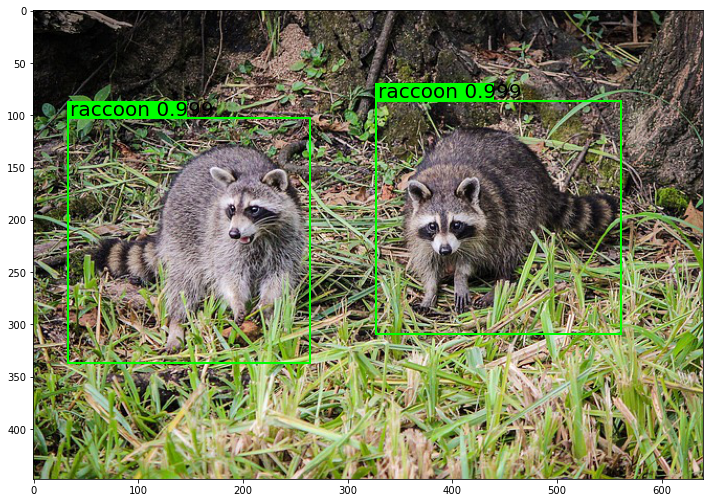

In [23]:
image = imageio.imread('D:/GeekBrains/comp_vision/les05/raccoons/images/raccoon-117.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

Processing time:  4.976109504699707


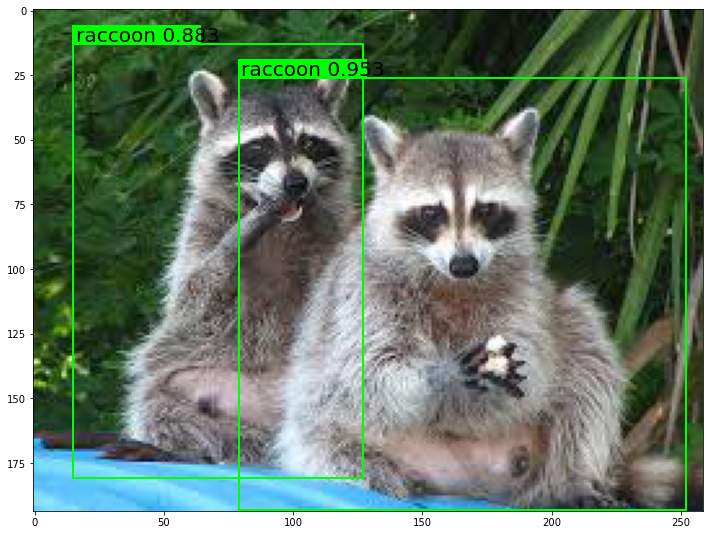

In [24]:
image = imageio.imread('D:/GeekBrains/comp_vision/les05/raccoons/images/raccoon-12.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)

Processing time:  5.104037046432495


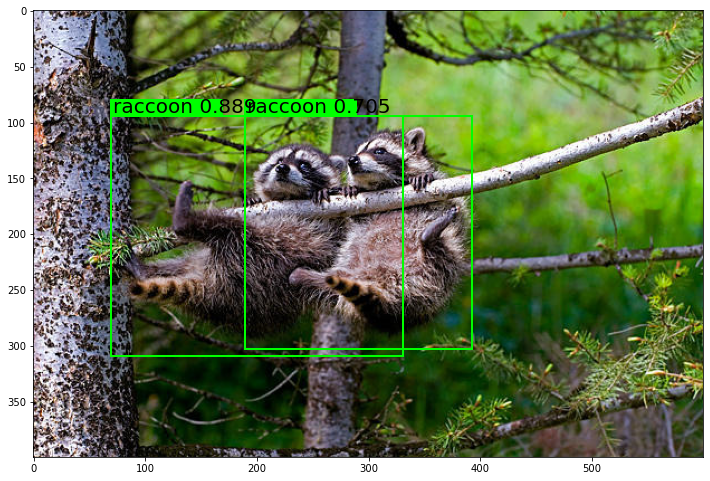

In [25]:
image = imageio.imread('D:/GeekBrains/comp_vision/les05/raccoons/images/raccoon-63.jpg')
predictions = detect_objects(image)
draw_predictions(image, predictions)